# Exploratory Data Analysis on BodyFat Dataset

# Business Problem

In this section exploratory data analysis will be made on bodyfat dataset.

# Dataset Story

This data set can be used to illustrate multiple regression techniques. Accurate measurement of body fat is inconvenient/costly and it is desirable to have easy methods of estimating body fat that are not inconvenient/costly.

The variables listed below, from left to right, are:

Age (years)

Weight (lbs)

Height (inches)

Neck circumference (cm)

Chest circumference (cm)

Abdomen 2 circumference (cm)

Hip circumference (cm)

Thigh circumference (cm)

Knee circumference (cm)

Ankle circumference (cm)

Biceps (extended) circumference (cm)

Forearm circumference (cm)

Wrist circumference (cm)


# Import Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [5]:
bodyfat = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/bodyfat.csv")
df = bodyfat.copy()
df.head()

Density  BodyFat  Age   Weight  Height    Neck    Chest  Abdomen      Hip   Thigh    Knee   Ankle  Biceps  Forearm   Wrist
0   1.0708  12.3000   23 154.2500 67.7500 36.2000  93.1000  85.2000  94.5000 59.0000 37.3000 21.9000 32.0000  27.4000 17.1000
1   1.0853   6.1000   22 173.2500 72.2500 38.5000  93.6000  83.0000  98.7000 58.7000 37.3000 23.4000 30.5000  28.9000 18.2000
2   1.0414  25.3000   22 154.0000 66.2500 34.0000  95.8000  87.9000  99.2000 59.6000 38.9000 24.0000 28.8000  25.2000 16.6000
3   1.0751  10.4000   26 184.7500 72.2500 37.4000 101.8000  86.4000 101.2000 60.1000 37.3000 22.8000 32.4000  29.4000 18.2000
4   1.0340  28.7000   24 184.2500 71.2500 34.4000  97.3000 100.0000 101.9000 63.2000 42.2000 24.0000 32.2000  27.7000 17.7000

In [7]:
df = df.drop("Density", axis = 1)
df.head()

BodyFat  Age   Weight  Height    Neck    Chest  Abdomen      Hip   Thigh    Knee   Ankle  Biceps  Forearm   Wrist
0  12.3000   23 154.2500 67.7500 36.2000  93.1000  85.2000  94.5000 59.0000 37.3000 21.9000 32.0000  27.4000 17.1000
1   6.1000   22 173.2500 72.2500 38.5000  93.6000  83.0000  98.7000 58.7000 37.3000 23.4000 30.5000  28.9000 18.2000
2  25.3000   22 154.0000 66.2500 34.0000  95.8000  87.9000  99.2000 59.6000 38.9000 24.0000 28.8000  25.2000 16.6000
3  10.4000   26 184.7500 72.2500 37.4000 101.8000  86.4000 101.2000 60.1000 37.3000 22.8000 32.4000  29.4000 18.2000
4  28.7000   24 184.2500 71.2500 34.4000  97.3000 100.0000 101.9000 63.2000 42.2000 24.0000 32.2000  27.7000 17.7000

In [8]:
def check_df(dataframe, head=5):
  print(20*"#", "HEAD", 20*"#")
  print(dataframe.head(head))
  print(20*"#", "TAIL", 20*"#")
  print(dataframe.tail(head))
  print(20*"#", "SHAPE", 20*"#")
  print(dataframe.shape)
  print(20*"#", "TYPES", 20*"#")
  print(dataframe.dtypes)
  print(20*"#", "NA", 20*"#")
  print(dataframe.isnull().sum())
  print(20*"#", "QUARTILES", 20*"#")
  print(dataframe.describe([0, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.99, 1]).T)

In [9]:
check_df(df)

#################### HEAD ####################
   BodyFat  Age   Weight  Height    Neck    Chest  Abdomen      Hip   Thigh    Knee   Ankle  Biceps  Forearm   Wrist
0  12.3000   23 154.2500 67.7500 36.2000  93.1000  85.2000  94.5000 59.0000 37.3000 21.9000 32.0000  27.4000 17.1000
1   6.1000   22 173.2500 72.2500 38.5000  93.6000  83.0000  98.7000 58.7000 37.3000 23.4000 30.5000  28.9000 18.2000
2  25.3000   22 154.0000 66.2500 34.0000  95.8000  87.9000  99.2000 59.6000 38.9000 24.0000 28.8000  25.2000 16.6000
3  10.4000   26 184.7500 72.2500 37.4000 101.8000  86.4000 101.2000 60.1000 37.3000 22.8000 32.4000  29.4000 18.2000
4  28.7000   24 184.2500 71.2500 34.4000  97.3000 100.0000 101.9000 63.2000 42.2000 24.0000 32.2000  27.7000 17.7000
#################### TAIL ####################
     BodyFat  Age   Weight  Height    Neck    Chest  Abdomen      Hip   Thigh    Knee   Ankle  Biceps  Forearm   Wrist
247  11.0000   70 134.2500 67.0000 34.9000  89.2000  83.6000  88.8000 49.6000 34.8000

# Analysis Categorical and Numerical Variables

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
  cat_cols += num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]
  return cat_cols, num_cols, cat_but_car, num_but_cat

In [11]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

print(f"Observation: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_Cols: {len(cat_cols)}")
print(f"Num_Cols: {len(num_cols)}")
print(f"Cat_But_Car: {len(cat_but_car)}")
print(f"Num_But_Cat: {len(num_but_cat)}")

Observation: 252
Variables: 14
Cat_Cols: 0
Num_Cols: 14
Cat_But_Car: 0
Num_But_Cat: 0


In [12]:
def num_summary(dataframe, num_col, plot=False):
  print(50*"#", num_col, 50*"#")
  quartiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quartiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.ylabel(num_col)
    plt.show(block=True)

In [13]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

In [14]:
def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  plt.figure(figsize=(24, 8))
  for index, col in enumerate(num_cols):
    plt.subplot(2,7, index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)

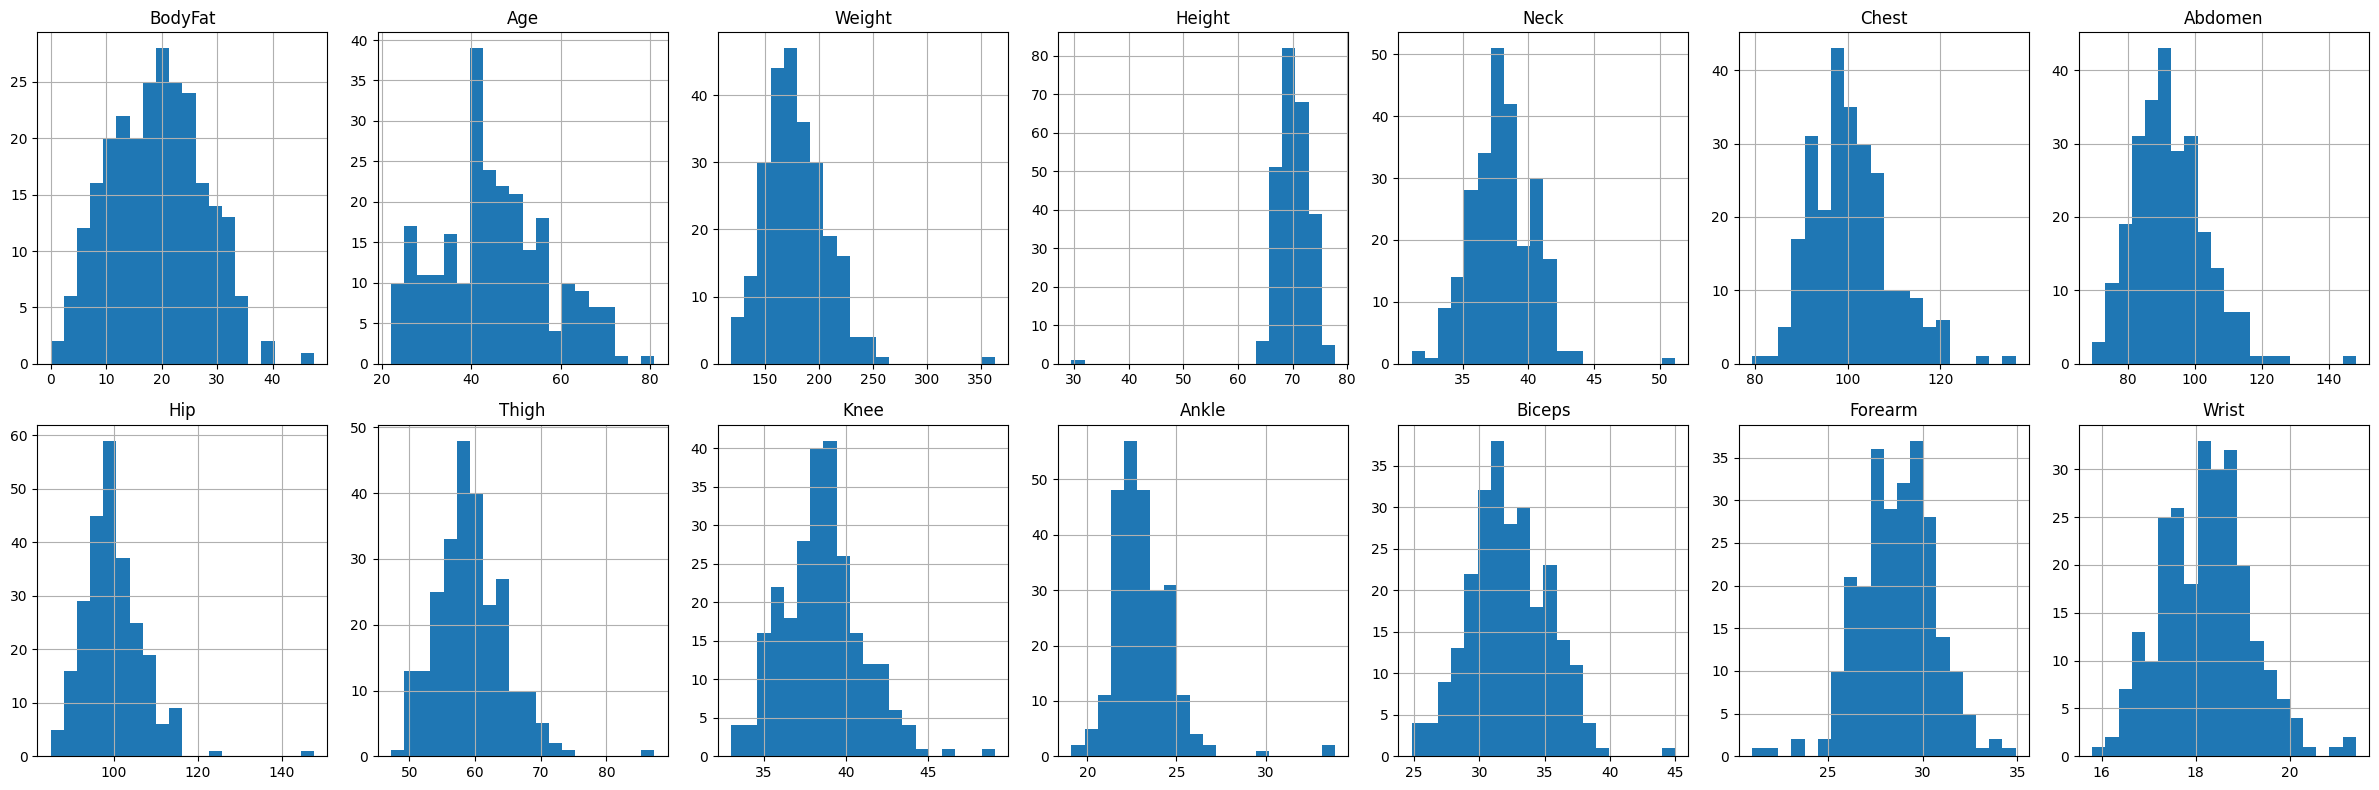

In [15]:
plot_num_summary(df)

# Correlation Analysis

In [16]:
def correlated_cols(dataframe, plot=False, jointplot=False):
  num_cols = [col for col in df.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  corr = dataframe[num_cols].corr()
  print(corr)
  if plot:
    sns.set(rc={'figure.figsize': (18,13)})
    sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
    plt.show()

  sns.pairplot(dataframe, kind="reg")

  if jointplot:
    for col in num_cols:
      sns.jointplot(x=col, y="BodyFat", data=dataframe, kind="reg")

         BodyFat     Age  Weight  Height   Neck  Chest  Abdomen     Hip   Thigh   Knee   Ankle  Biceps  Forearm  Wrist
BodyFat   1.0000  0.2915  0.6124 -0.0895 0.4906 0.7026   0.8134  0.6252  0.5596 0.5087  0.2660  0.4933   0.3614 0.3466
Age       0.2915  1.0000 -0.0127 -0.1716 0.1135 0.1764   0.2304 -0.0503 -0.2001 0.0175 -0.1051 -0.0412  -0.0851 0.2135
Weight    0.6124 -0.0127  1.0000  0.3083 0.8307 0.8942   0.8880  0.9409  0.8687 0.8532  0.6137  0.8004   0.6303 0.7298
Height   -0.0895 -0.1716  0.3083  1.0000 0.2537 0.1349   0.0878  0.1704  0.1484 0.2861  0.2647  0.2078   0.2286 0.3221
Neck      0.4906  0.1135  0.8307  0.2537 1.0000 0.7848   0.7541  0.7350  0.6957 0.6724  0.4779  0.7311   0.6237 0.7448
Chest     0.7026  0.1764  0.8942  0.1349 0.7848 1.0000   0.9158  0.8294  0.7299 0.7195  0.4830  0.7279   0.5802 0.6602
Abdomen   0.8134  0.2304  0.8880  0.0878 0.7541 0.9158   1.0000  0.8741  0.7666 0.7372  0.4532  0.6850   0.5033 0.6198
Hip       0.6252 -0.0503  0.9409  0.1704 0.7350 

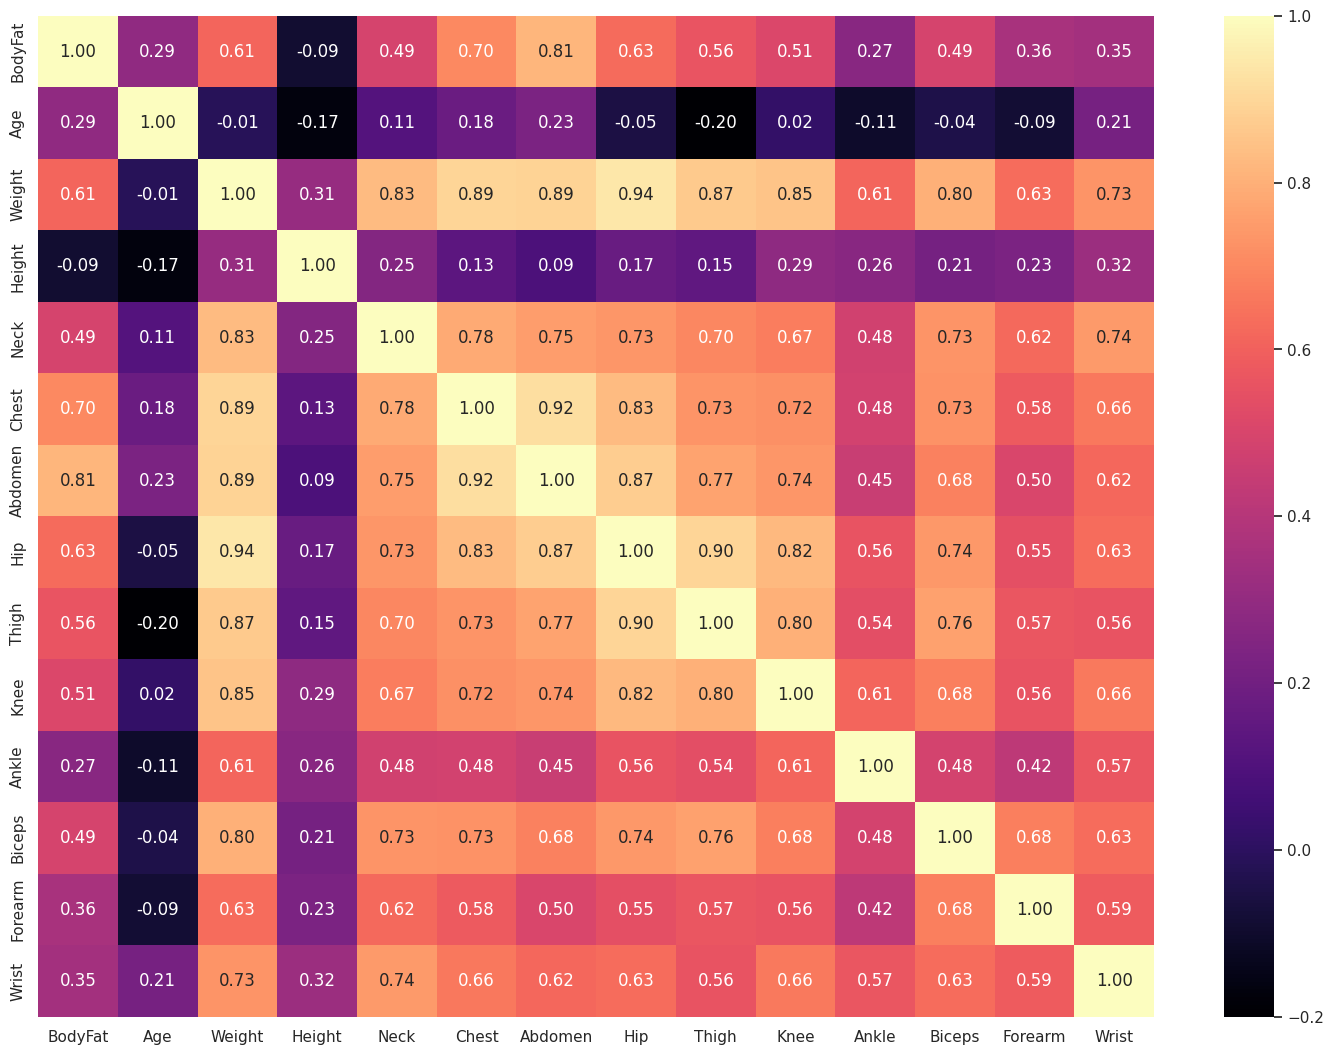

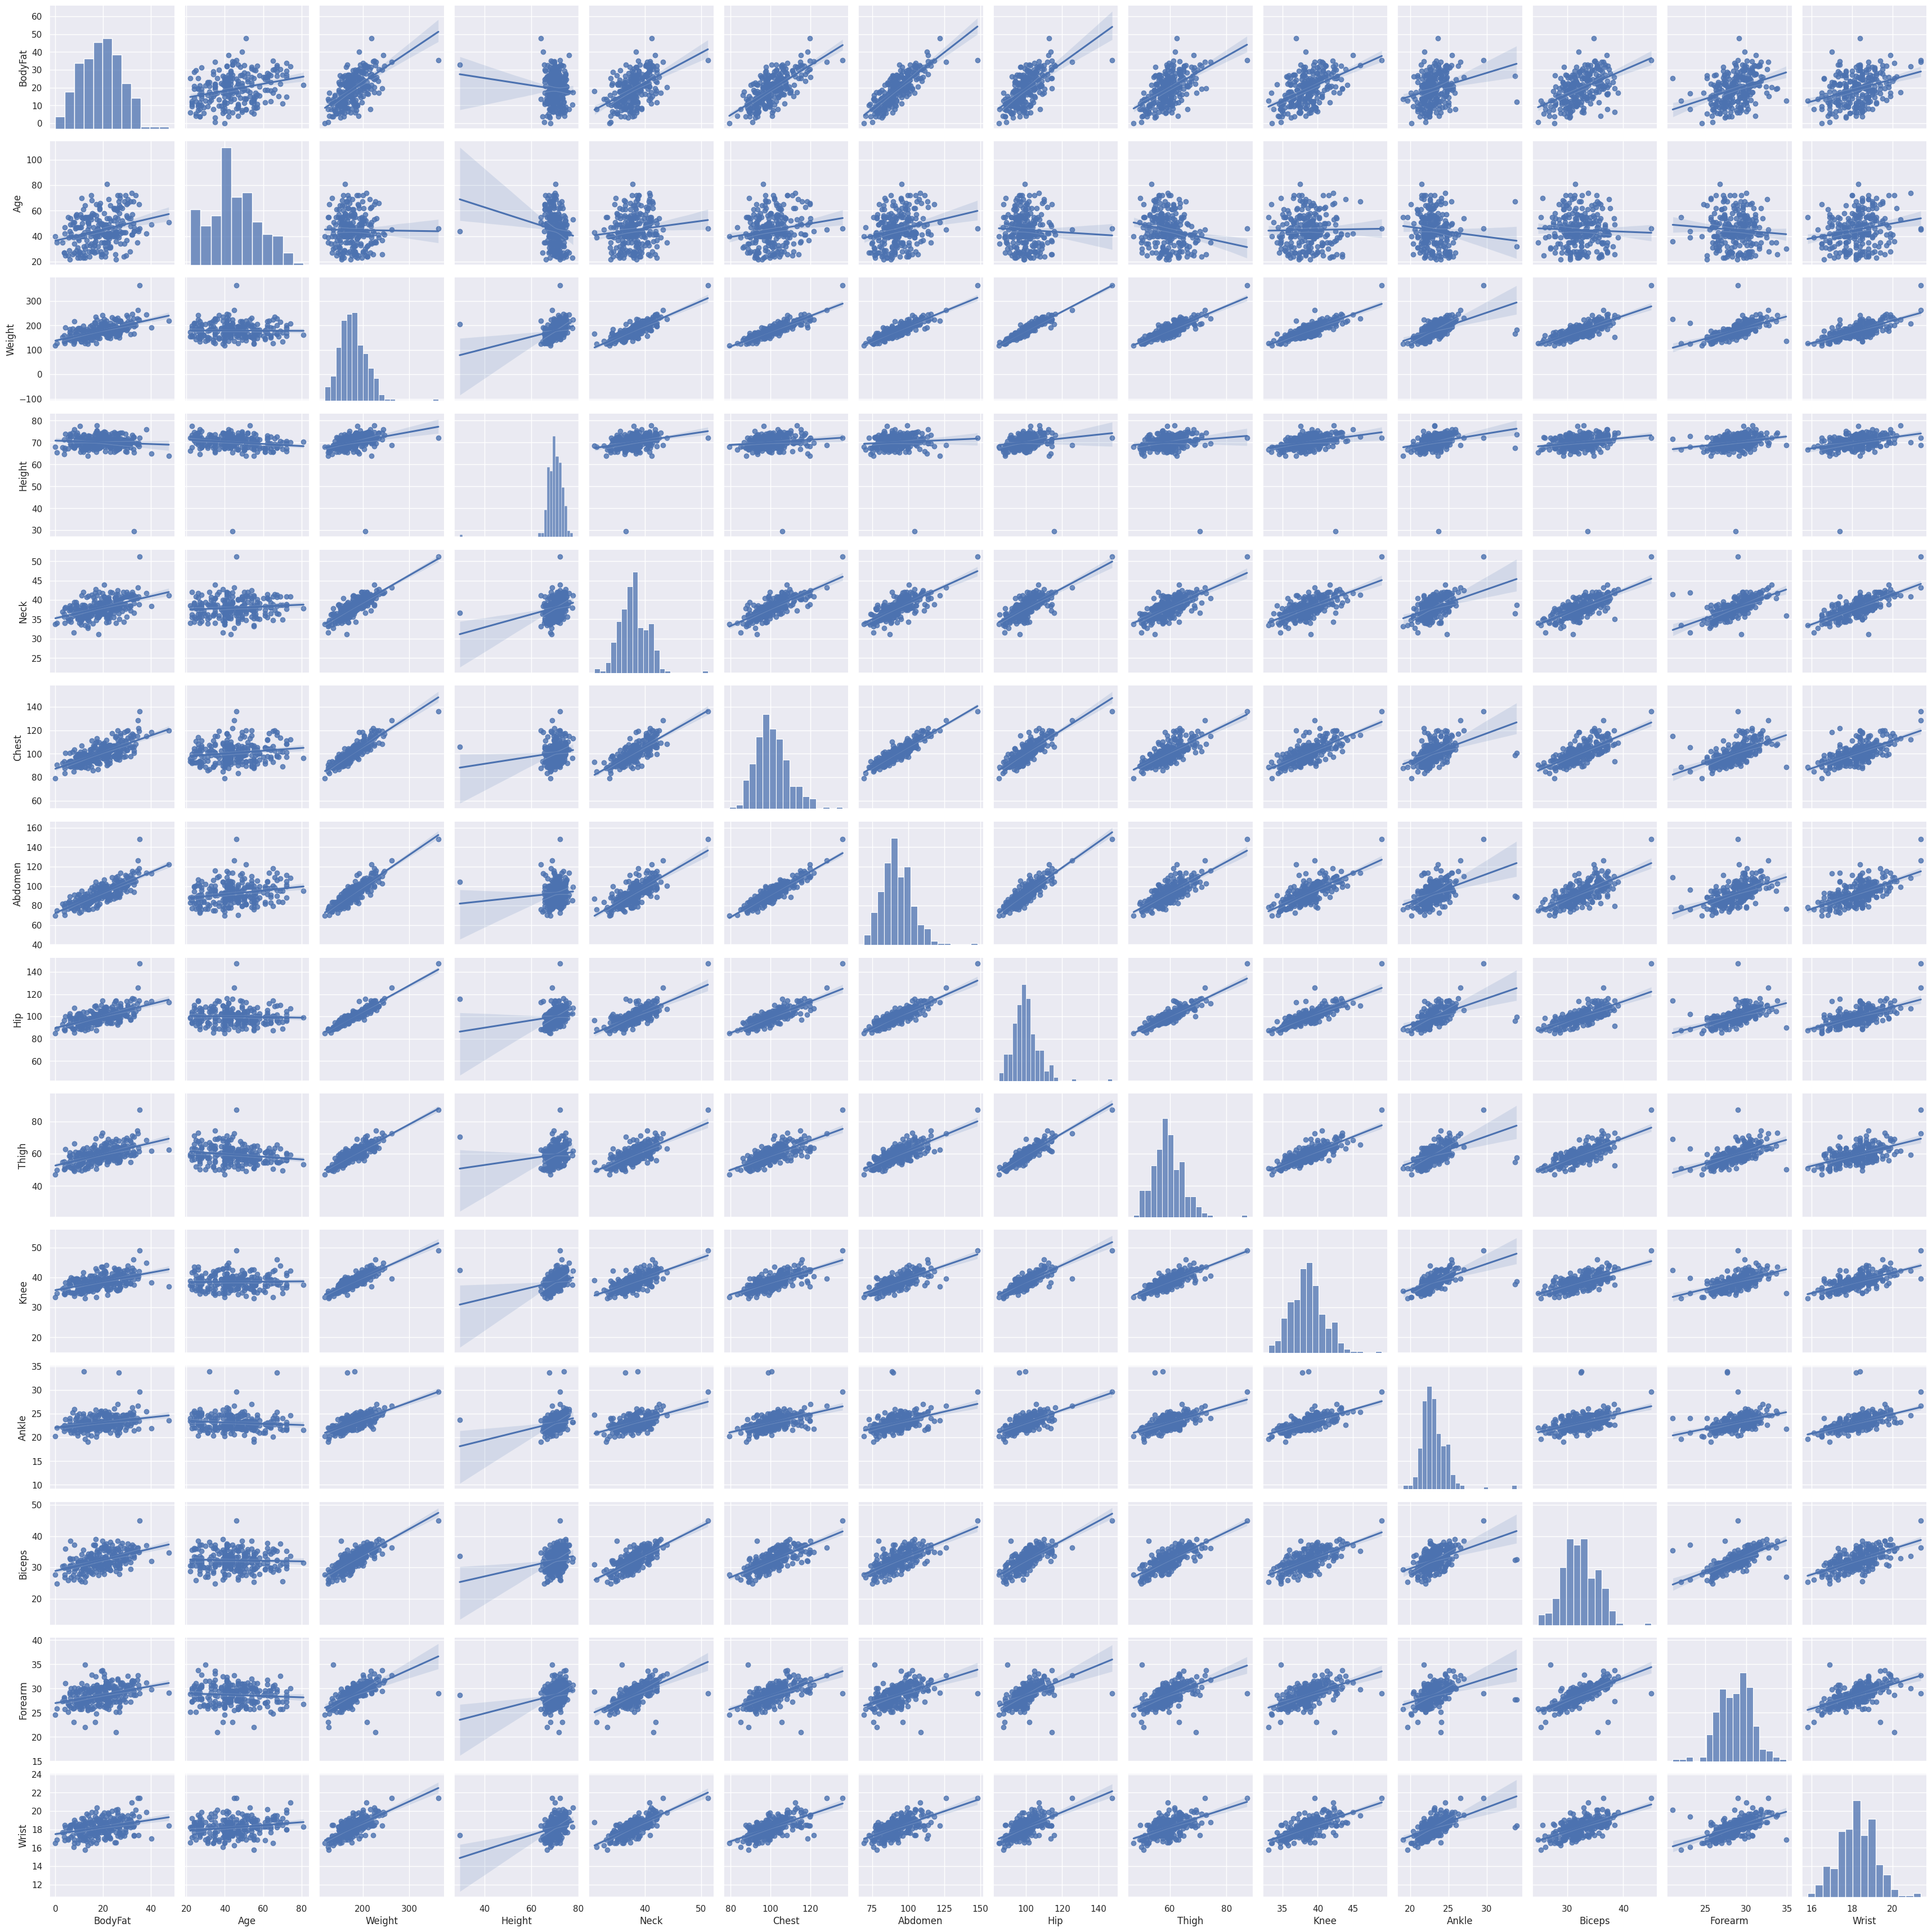

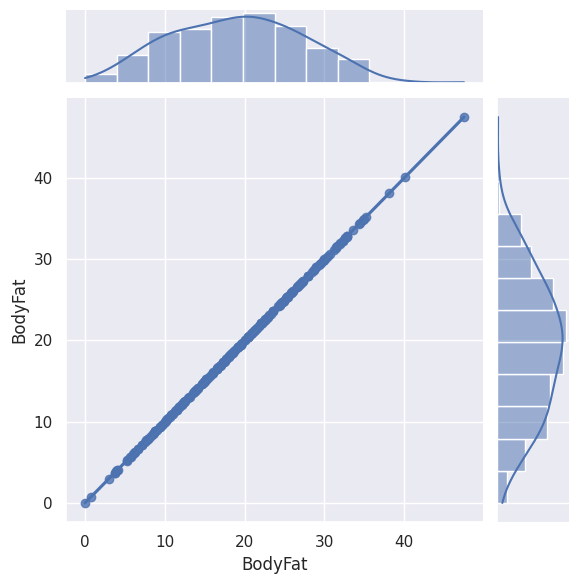

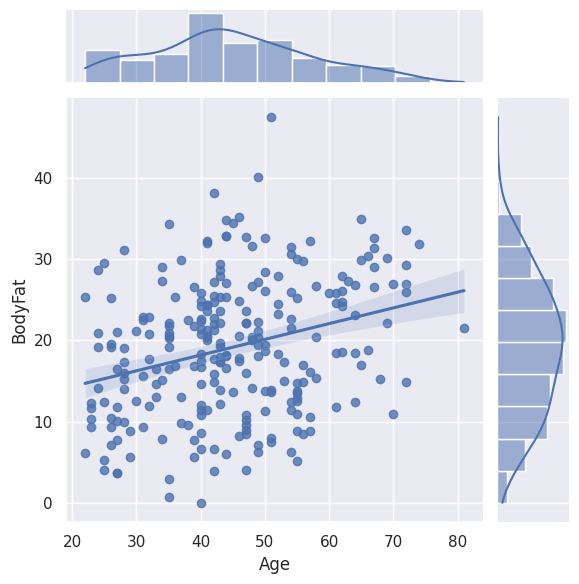

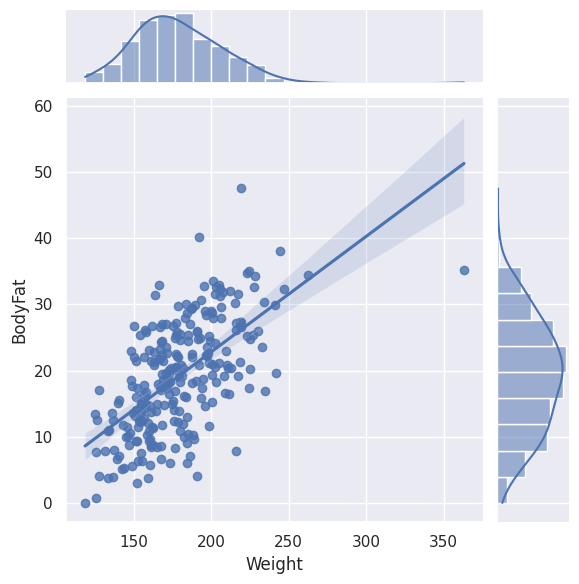

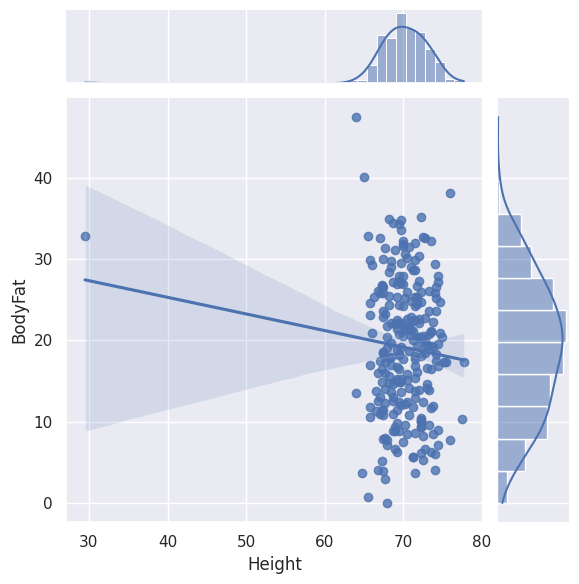

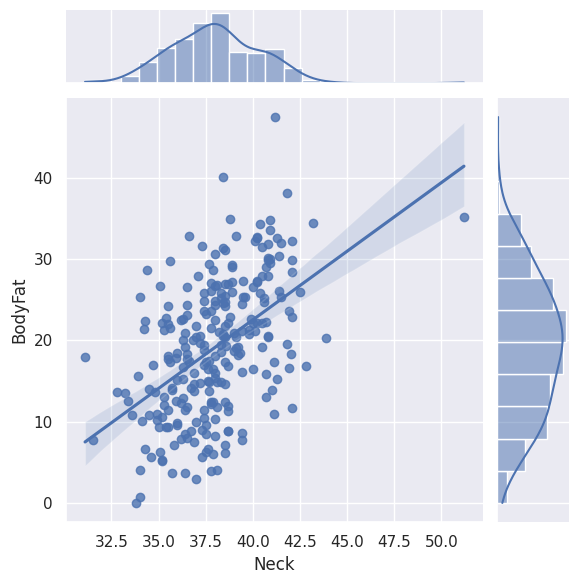

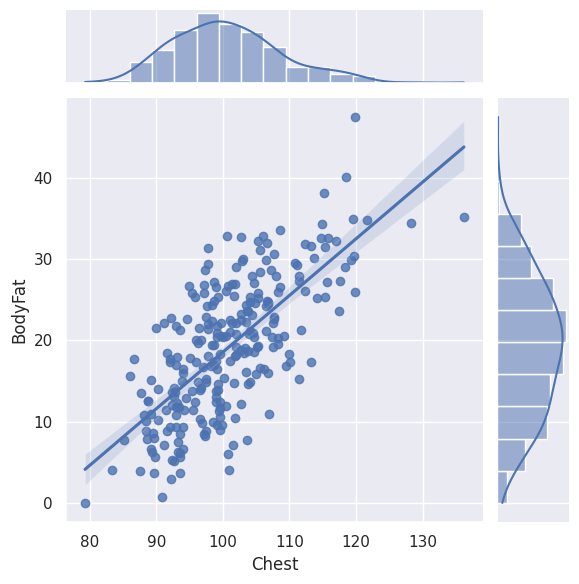

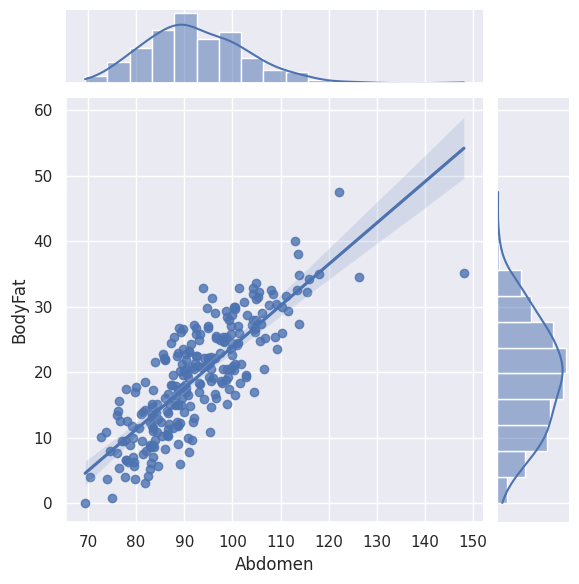

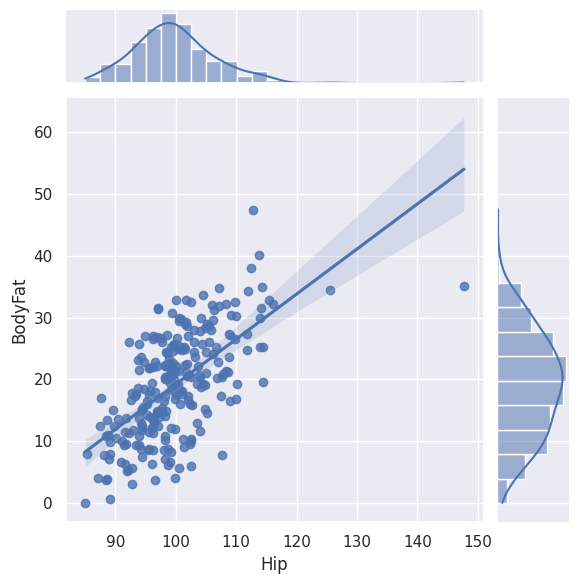

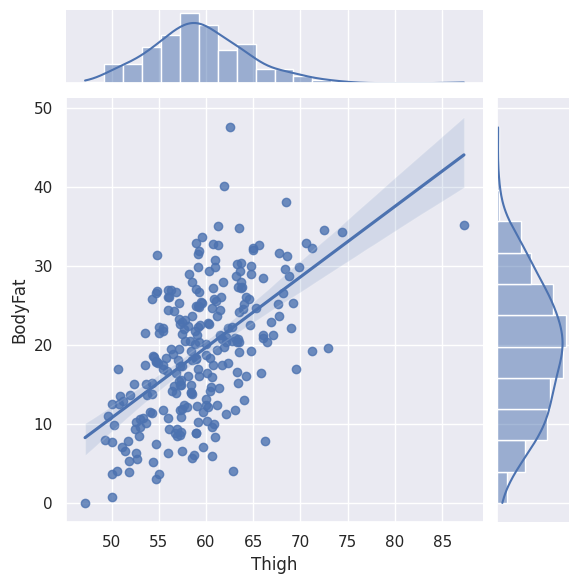

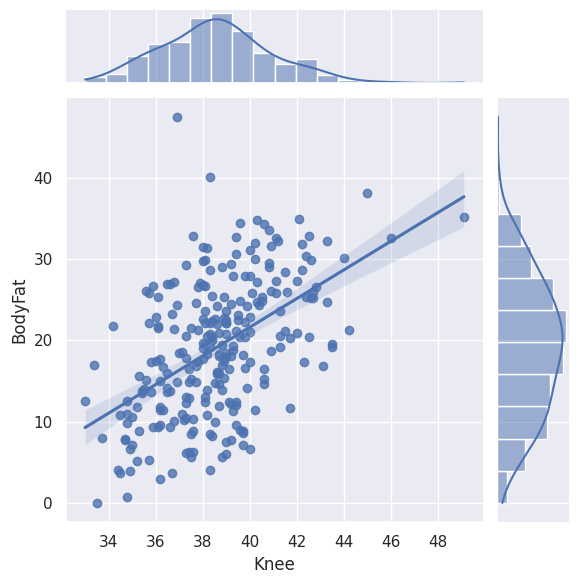

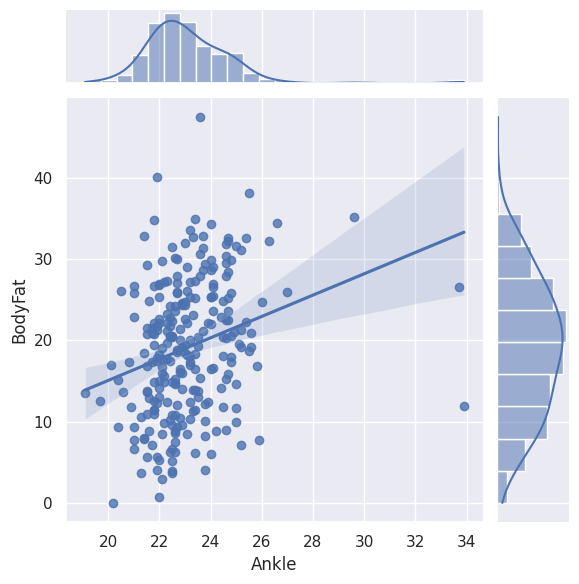

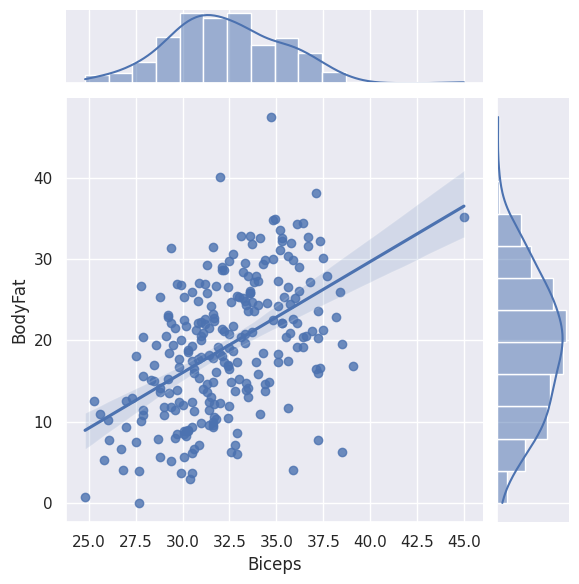

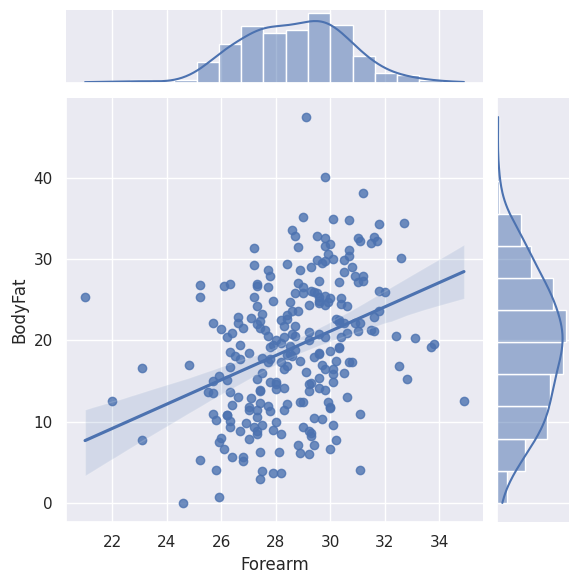

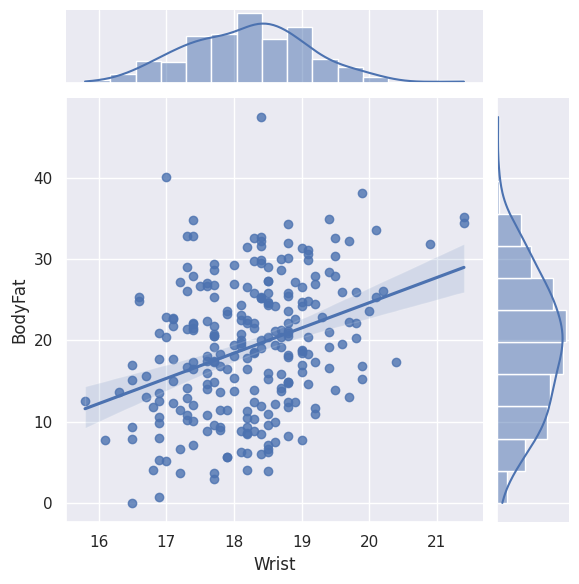

In [17]:
correlated_cols(df, plot=True, jointplot=True)

In [18]:
def high_correlated_cols(dataframe, corr_th = 0.90, plot = False):
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  corr = dataframe[num_cols].corr()
  corr_matrix = corr.abs()
  upper_triangular_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  drop_list = [col for col in upper_triangular_matrix.columns if any(upper_triangular_matrix[col] > corr_th)]
  if drop_list == []:
    print("After corelation analysis we dont need to remove veriables.")



  if plot:
    sns.set(rc={'figure.figsize': (18,13)})
    sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
    plt.show()
  return drop_list

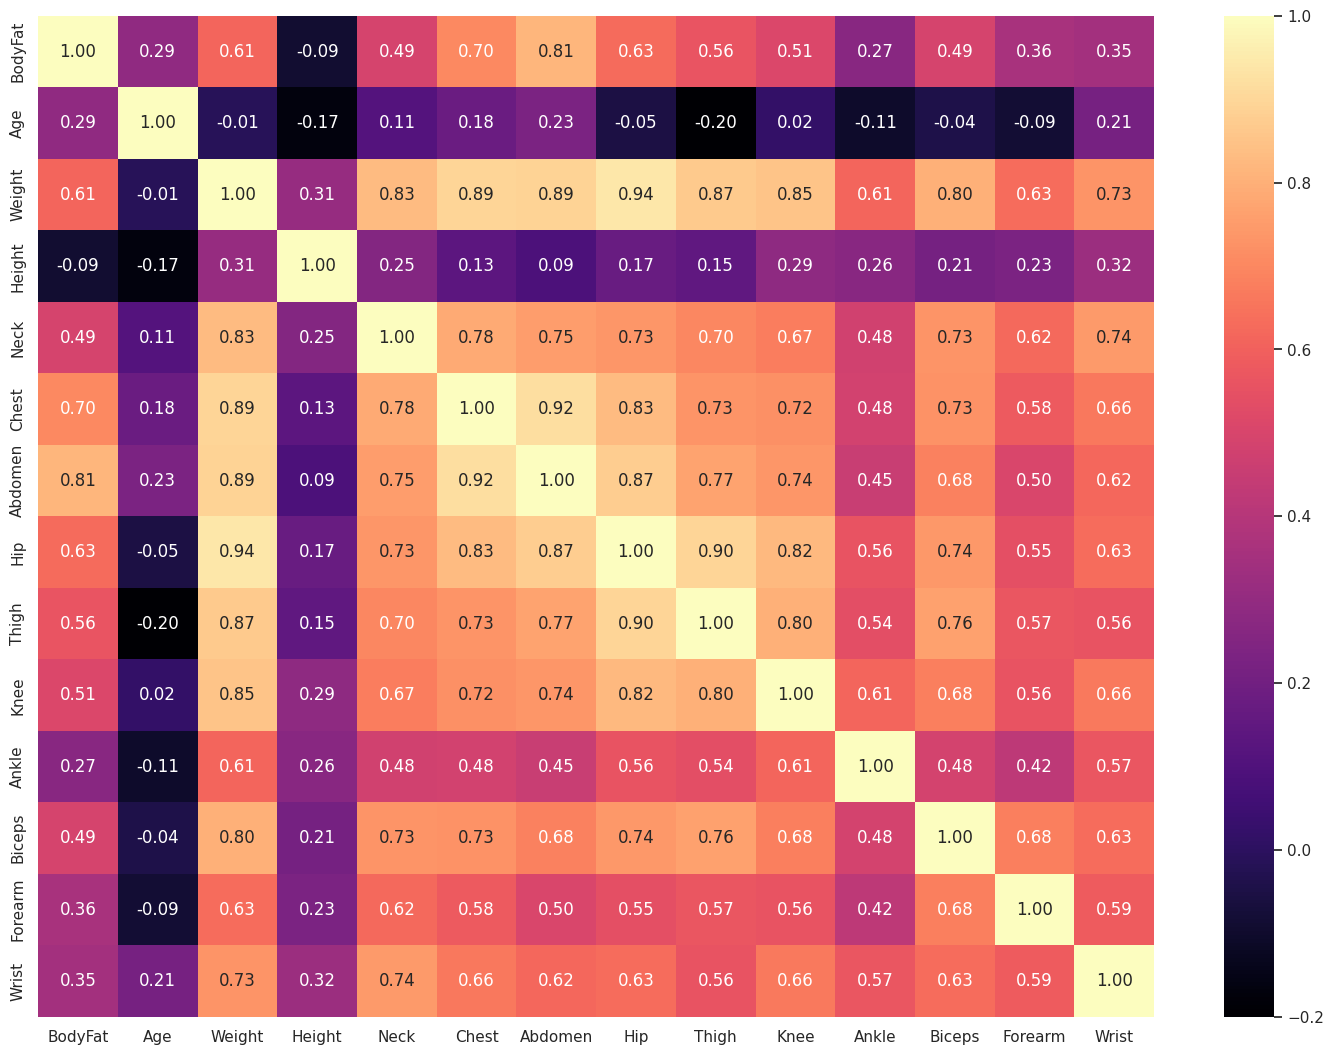

['Abdomen', 'Hip']

In [19]:
high_correlated_cols(df, plot=True)

# Plot distplot, boxplot, probplot

In [20]:
def plot_dist_box_prob(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  fig,ax = plt.subplots(14,3,figsize=(30,90))
  sns.set(font_scale=2.5)
  for index, col in enumerate(num_cols):
    sns.distplot(dataframe[col],ax=ax[index,0])
    sns.boxplot(dataframe[col],ax=ax[index,1])
    stats.probplot(dataframe[col],plot=ax[index,2])
  fig.tight_layout()
  fig.subplots_adjust(top=0.95)
  plt.suptitle("Visualizing Continuous Columns")